In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from PIL import Image
import shutil

In [ ]:
dataset_156 = "G:\\Klasyfikacja_Wizja\\mri_156"
dataset_67 = "G:\\Klasyfikacja_Wizja\\mri_67\\Brain_Tumor_Detection\\no"

In [ ]:
file_path_dataset_156 = []
file_class_dataset_156 = []

dataset_156_dirs = os.listdir(dataset_156)

for dir in dataset_156_dirs:
    path = os.path.join(dataset_156, dir)
    sub_path = os.listdir(path)
    for item in sub_path:
        item_path = os.path.join(path, item)
        file_path = os.listdir(item_path)
        for file in file_path:
            file_path_dataset_156.append(os.path.join(item_path, file))
            part_156 = file.split('-')[1]
            part_156 = part_156.split('_')[0]
            part_156 = part_156.split('T')[0]
            if part_156 == "gl":
                file_class_dataset_156.append("glioma")
            elif part_156 == "me":
                file_class_dataset_156.append("meningioma")
            elif part_156 == "no":
                file_class_dataset_156.append("notumor")
            elif part_156 == "pi":
                file_class_dataset_156.append("pituitary")
            else:
                file_class_dataset_156.append("UNKNOWN")

class_156_df = pd.DataFrame(file_class_dataset_156, columns=['Class'])
path_156_df = pd.DataFrame(file_path_dataset_156, columns=['Path'])

dataset_156_df = pd.concat([class_156_df, path_156_df], axis=1)
print(dataset_156_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_156_df

Class
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


,Class,Path
0,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0000.jpg
1,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0001.jpg
2,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0002.jpg
3,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0003.jpg
4,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0004.jpg
...,...,...
7018,pituitary,G:\Klasyfikacja_Wizja\mri_156\Training\pituitary\Tr-pi_1452.jpg
7019,pituitary,G:\Klasyfikacja_Wizja\mri_156\Training\pituitary\Tr-pi_1453.jpg
7020,pituitary,G:\Klasyfikacja_Wizja\mri_156\Training\pituitary\Tr-pi_1454.jpg
7021,pituitary,G:\Klasyfikacja_Wizja\mri_156\Training\pituitary\Tr-pi_1455.jpg


In [ ]:
file_path_dataset_67 = []
file_class_dataset_67 = []

dataset_67_dirs = os.listdir(dataset_67)

for file in dataset_67_dirs:
    file_path_dataset_67.append(os.path.join(dataset_67, file))
    part_67 = file.split("o")[0]
    if part_67 == "n":
        file_class_dataset_67.append("notumor")
    else:
        file_class_dataset_67.append("notumor")

class_67_df = pd.DataFrame(file_class_dataset_67, columns=['Class'])
path_67_df = pd.DataFrame(file_path_dataset_67, columns=['Path'])
dataset_67_df = pd.concat([class_67_df, path_67_df], axis=1)
print(dataset_67_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_67_df

Class
notumor    1500
Name: count, dtype: int64


,Class,Path
0,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no0.jpg
1,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no1.jpg
2,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no10.jpg
3,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no100.jpg
4,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no1000.jpg
...,...,...
1495,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no995.jpg
1496,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no996.jpg
1497,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no997.jpg
1498,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no998.jpg


In [ ]:
data_path = pd.concat([dataset_156_df, dataset_67_df], axis = 0)
print(data_path.Class.value_counts())
data_path

Class
notumor       3500
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


,Class,Path
0,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0000.jpg
1,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0001.jpg
2,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0002.jpg
3,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0003.jpg
4,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0004.jpg
...,...,...
1495,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no995.jpg
1496,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no996.jpg
1497,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no997.jpg
1498,notumor,G:\Klasyfikacja_Wizja\mri_67\Brain_Tumor_Detection\no\no998.jpg


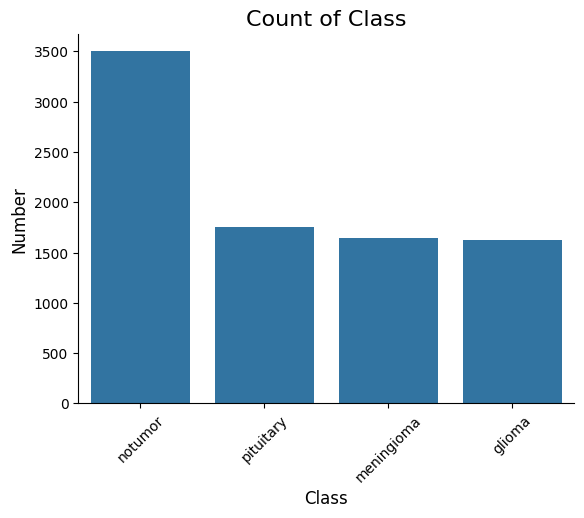

In [ ]:
plt.title('Count of Class', size=16)
sns.barplot(x=data_path['Class'].value_counts().index, y=data_path['Class'].value_counts())
plt.ylabel('Number', size=12)
plt.xlabel('Class', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import pandas as pd

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

augmented_data_path = "G:\\Klasyfikacja_Wizja\\augment_images"
os.makedirs(augmented_data_path, exist_ok=True)

classes = ['pituitary', 'meningioma', 'glioma']
augmentation_factor = 1

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_name in classes:
    class_data = data_path[data_path['Class'] == class_name]
    class_augmented_path = os.path.join(augmented_data_path, class_name)
    os.makedirs(class_augmented_path, exist_ok=True)

    for _, row in class_data.iterrows():
        img_path = row['Path']
        img_name = os.path.basename(img_path)
        new_img_name = f"{class_name}_{img_name}"

        img = load_and_preprocess_image(img_path)
        img = img.reshape((1,) + img.shape)

        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=class_augmented_path, save_prefix='', save_format='jpg'):
            i += 1
            if i >= augmentation_factor:
                break

In [ ]:
dataset_aug = "G:\\Klasyfikacja_Wizja\\augment_images"

file_path_dataset_aug = []
file_class_dataset_aug = []

dataset_aug_dirs = os.listdir(dataset_aug)

for class_name in dataset_aug_dirs:
    class_path = os.path.join(dataset_aug, class_name)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            file_path_dataset_aug.append(file_path)
            file_class_dataset_aug.append(class_name)

class_aug_df = pd.DataFrame(file_class_dataset_aug, columns=['Class'])
path_aug_df = pd.DataFrame(file_path_dataset_aug, columns=['Path'])
dataset_aug_df = pd.concat([class_aug_df, path_aug_df], axis=1)
print(dataset_aug_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_aug_df

Class
pituitary     1605
meningioma    1506
glioma        1498
Name: count, dtype: int64


,Class,Path
0,glioma,G:\Klasyfikacja_Wizja\augment_images\glioma\_0_1000.jpg
1,glioma,G:\Klasyfikacja_Wizja\augment_images\glioma\_0_101.jpg
2,glioma,G:\Klasyfikacja_Wizja\augment_images\glioma\_0_1013.jpg
3,glioma,G:\Klasyfikacja_Wizja\augment_images\glioma\_0_1014.jpg
4,glioma,G:\Klasyfikacja_Wizja\augment_images\glioma\_0_1019.jpg
...,...,...
4604,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9955.jpg
4605,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9963.jpg
4606,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9966.jpg
4607,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9973.jpg


In [ ]:
df_path = pd.concat([data_path, dataset_aug_df], axis = 0)
print(df_path.Class.value_counts())
df_path

Class
notumor       3500
pituitary     3362
meningioma    3151
glioma        3119
Name: count, dtype: int64


,Class,Path
0,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0000.jpg
1,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0001.jpg
2,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0002.jpg
3,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0003.jpg
4,glioma,G:\Klasyfikacja_Wizja\mri_156\Testing\glioma\Te-glTr_0004.jpg
...,...,...
4604,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9955.jpg
4605,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9963.jpg
4606,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9966.jpg
4607,pituitary,G:\Klasyfikacja_Wizja\augment_images\pituitary\_0_9973.jpg


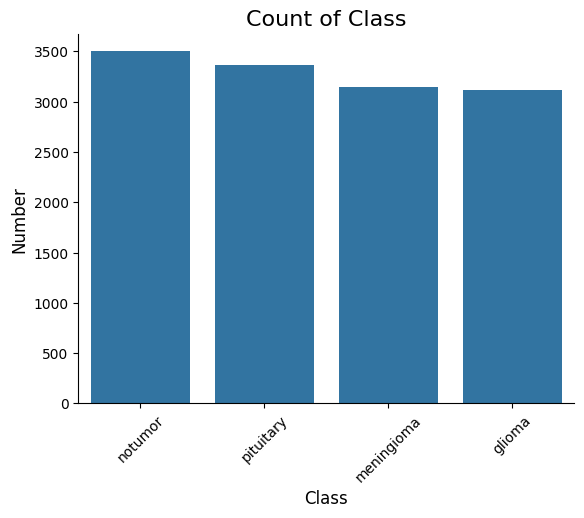

In [ ]:
plt.title('Count of Class', size=16)
sns.barplot(x=df_path['Class'].value_counts().index, y=df_path['Class'].value_counts())
plt.ylabel('Number', size=12)
plt.xlabel('Class', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df_path['Path'], df_path['Class'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
val_df = pd.concat([pd.DataFrame(X_val), pd.DataFrame(y_val)], axis=1)
print(train_df.Class.value_counts(),"\n")
print(test_df.Class.value_counts(),"\n")
print(val_df.Class.value_counts(),"\n")

Class
notumor       2478
pituitary     2377
meningioma    2197
glioma        2140
Name: count, dtype: int64 

Class
pituitary     673
notumor       665
meningioma    659
glioma        642
Name: count, dtype: int64 

Class
notumor       357
glioma        337
pituitary     312
meningioma    295
Name: count, dtype: int64 



In [ ]:
datagen_majority = ImageDataGenerator(rescale=1./255)

train_generator = datagen_majority.flow_from_dataframe(
    dataframe=train_df,
    x_col='Path',
    y_col='Class',
    target_size=(128,128),
    batch_size=(32),
    class_mode='categorical',
    shuffle=False
)

validation_generator = datagen_majority.flow_from_dataframe(
    dataframe=val_df,
    x_col='Path',
    y_col='Class',
    target_size=(128,128),
    batch_size=(32),
    class_mode='categorical',
    shuffle=False
)

Found 9192 validated image filenames belonging to 4 classes.
Found 1301 validated image filenames belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
)

Epoch 1/100
288/288 [==============================] - 311s 1s/step - loss: 0.6374 - accuracy: 0.7633 - val_loss: 2.1816 - val_accuracy: 0.2414 - lr: 0.0010
Epoch 2/100
288/288 [==============================] - 274s 951ms/step - loss: 0.4318 - accuracy: 0.8485 - val_loss: 1.4555 - val_accuracy: 0.5281 - lr: 0.0010
Epoch 3/100
288/288 [==============================] - 292s 1s/step - loss: 0.3597 - accuracy: 0.8706 - val_loss: 0.3004 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 4/100
288/288 [==============================] - 279s 968ms/step - loss: 0.3003 - accuracy: 0.8927 - val_loss: 0.6074 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 5/100
288/288 [==============================] - 269s 935ms/step - loss: 0.2513 - accuracy: 0.9102 - val_loss: 1.1635 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 6/100
288/288 [==============================] - ETA: 0s - loss: 0.2215 - accuracy: 0.9225
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
288/288 [========================

In [ ]:
from keras.models import load_model
model.save('model100.h5')

C:\Users\Patryk\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

with open('model100.pkl', 'wb') as file:
    pickle.dump(history.history, file)

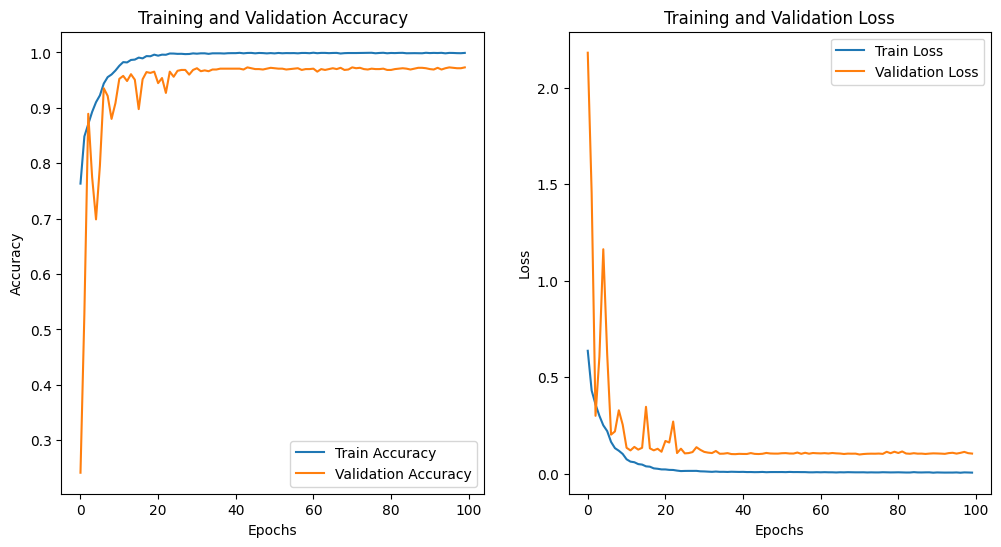

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Found 2639 validated image filenames belonging to 4 classes.
83/83 [==============================] - 48s 582ms/step
Test Accuracy: 0.9734748010610079
              precision    recall  f1-score   support

      glioma       0.98      0.97      0.97       642
  meningioma       0.96      0.94      0.95       659
     notumor       0.99      0.99      0.99       665
   pituitary       0.96      0.99      0.98       673

    accuracy                           0.97      2639
   macro avg       0.97      0.97      0.97      2639
weighted avg       0.97      0.97      0.97      2639

Confusion Matrix:
[[624  16   0   2]
 [ 15 619   3  22]
 [  0   5 658   2]
 [  0   4   1 668]]


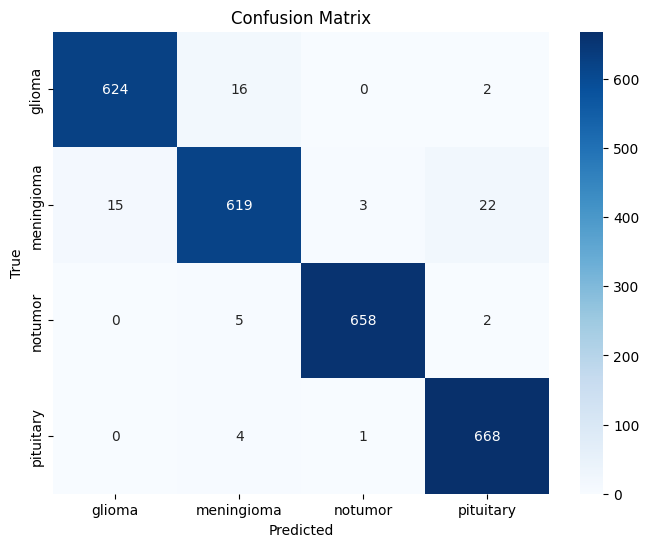

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

datagen_majority = ImageDataGenerator(rescale=1./255)

test_generator = datagen_majority.flow_from_dataframe(
    dataframe=test_df,
    x_col='Path',
    y_col='Class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

class_names = list(test_generator.class_indices.keys())
predicted_class_names = [class_names[i] for i in predicted_classes]

test_accuracy = accuracy_score(test_generator.classes, predicted_classes)

print(f'Test Accuracy: {test_accuracy}')

print(classification_report(test_generator.classes, predicted_classes, target_names=class_names))

conf_mat = confusion_matrix(test_generator.classes, predicted_classes)

print("Confusion Matrix:")
print(conf_mat)

# Wizualizacja macierzy pomyłek za pomocą seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

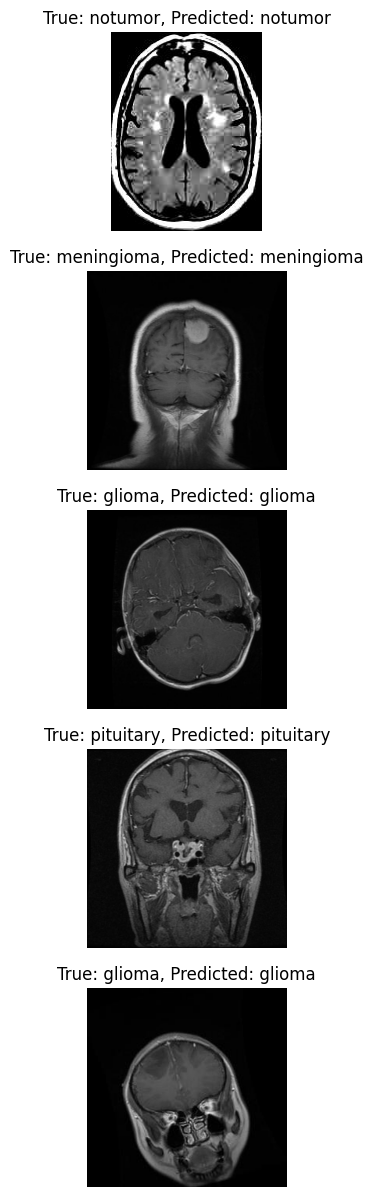

In [ ]:
import matplotlib.pyplot as plt
import random

def display_images_with_labels(images, true_labels, predicted_labels, class_names, num_images=5):
    plt.figure(figsize=(15, 3 * num_images))

    for i in range(num_images):
        index = random.randint(0, len(images) - 1)
        img = plt.imread(images[index])

        plt.subplot(num_images, 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {class_names[true_labels[index]]}, Predicted: {class_names[predicted_labels[index]]}')
        plt.axis('off')

display_images_with_labels(test_generator.filepaths, test_generator.classes, predicted_classes, class_names)
plt.show()